In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        file = os.path.join(dirname, filename)


## 1.  What is the title of the data with the highest rank?



In [23]:
data = pd.read_csv(file)

# Data Clean Up 
data["Start date"] = pd.to_datetime(data['Start date'])
data["Start year"] = data["Start date"].dt.year
data["End date"] = pd.to_datetime(data['End date'])
data["End year"] = data["End date"].dt.year
data["Members"] = data["Members"].apply(lambda x: int(x.replace(",","")))

data["Duration "] = data["End date"] - data["Start date"]


C:\Users\micha\AppData\Local\Temp\ipykernel_1628\160150813.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Start date"] = pd.to_datetime(data['Start date'])
C:\Users\micha\AppData\Local\Temp\ipykernel_1628\160150813.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["End date"] = pd.to_datetime(data['End date'])


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   UID          8650 non-null   int64          
 1   Title        8650 non-null   object         
 2   Rank         8650 non-null   int64          
 3   Stream type  8650 non-null   object         
 4   Episodes     8608 non-null   float64        
 5   Start date   8648 non-null   datetime64[ns] 
 6   End date     8551 non-null   datetime64[ns] 
 7   Members      8650 non-null   int64          
 8   Score        8650 non-null   float64        
 9   Start year   8648 non-null   float64        
 10  End year     8551 non-null   float64        
 11  Duration     8551 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2), timedelta64[ns](1)
memory usage: 811.1+ KB


In [25]:
df_score = data.sort_values(by="Score", ascending=False).copy()
df_score

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Start year,End year,Duration
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35,2023.0,2024.0,182 days
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09,2009.0,2010.0,456 days
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,2584616,9.07,2011.0,2011.0,153 days
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,636631,9.06,2015.0,2016.0,335 days
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,2305044,9.05,2019.0,2019.0,91 days
...,...,...,...,...,...,...,...,...,...,...,...,...
8624,8625,Attack No.1 (1970),8625,Movie,1.0,1970-03-01,1970-03-01,1426,6.15,1970.0,1970.0,0 days
8623,8624,21 Emon,8624,TV,39.0,1991-05-01,1992-03-01,1445,6.15,1991.0,1992.0,305 days
8622,8623,15-fun de Wakaru Inazuma Eleven: Ares no Tenbin,8623,ONA,1.0,2018-06-01,2018-06-01,541,6.15,2018.0,2018.0,0 days
8621,8622,(OO),8622,Movie,1.0,2017-01-01,2017-01-01,276,6.15,2017.0,2017.0,0 days


In [26]:
x = 5
top_x = df_score.head(x)
top_x_plot = top_x[["Title", "Score"]]
# top_x = top_x.pivot_table(index="Title", columns=["Score"], aggfunc="sum")
top_x_plot

,Title,Score
0,Sousou no Frieren,9.35
1,Fullmetal Alchemist: Brotherhood,9.09
2,Steins;Gate,9.07
3,Gintama°,9.06
4,Shingeki no Kyojin Season 3 Part 2,9.05


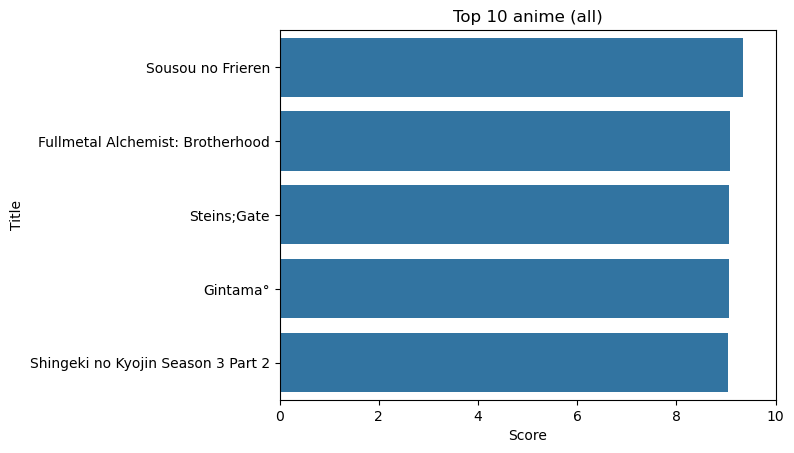

In [27]:
sns.barplot(data=top_x_plot, x="Score", y="Title")
plt.title("Top 10 anime (all)")
plt.xlim(0, 10)
plt.show()

In [28]:
df_score

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Start year,End year,Duration
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35,2023.0,2024.0,182 days
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09,2009.0,2010.0,456 days
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,2584616,9.07,2011.0,2011.0,153 days
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,636631,9.06,2015.0,2016.0,335 days
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,2305044,9.05,2019.0,2019.0,91 days
...,...,...,...,...,...,...,...,...,...,...,...,...
8624,8625,Attack No.1 (1970),8625,Movie,1.0,1970-03-01,1970-03-01,1426,6.15,1970.0,1970.0,0 days
8623,8624,21 Emon,8624,TV,39.0,1991-05-01,1992-03-01,1445,6.15,1991.0,1992.0,305 days
8622,8623,15-fun de Wakaru Inazuma Eleven: Ares no Tenbin,8623,ONA,1.0,2018-06-01,2018-06-01,541,6.15,2018.0,2018.0,0 days
8621,8622,(OO),8622,Movie,1.0,2017-01-01,2017-01-01,276,6.15,2017.0,2017.0,0 days


In [29]:
x_bottom_x = 10
bottom_x = df_score.tail(x_bottom_x)
bottom_x_plot = bottom_x[["Title", "Score"]]
# top_x = top_x.pivot_table(index="Title", columns=["Score"], aggfunc="sum")
bottom_x_plot

,Title,Score
8630,Dengeki Bunko 2007 Movie Festival Special,6.15
8629,Deji Meets Girl,6.15
8628,Chocolate Underground: Bokura no Chocolate Sensou,6.15
8627,Catman Series II,6.15
8626,Buddy Go!,6.15
8624,Attack No.1 (1970),6.15
8623,21 Emon,6.15
8622,15-fun de Wakaru Inazuma Eleven: Ares no Tenbin,6.15
8621,(OO),6.15
8649,Sore Ike! Anpanman: Black Nose to Mahou no Uta,6.15


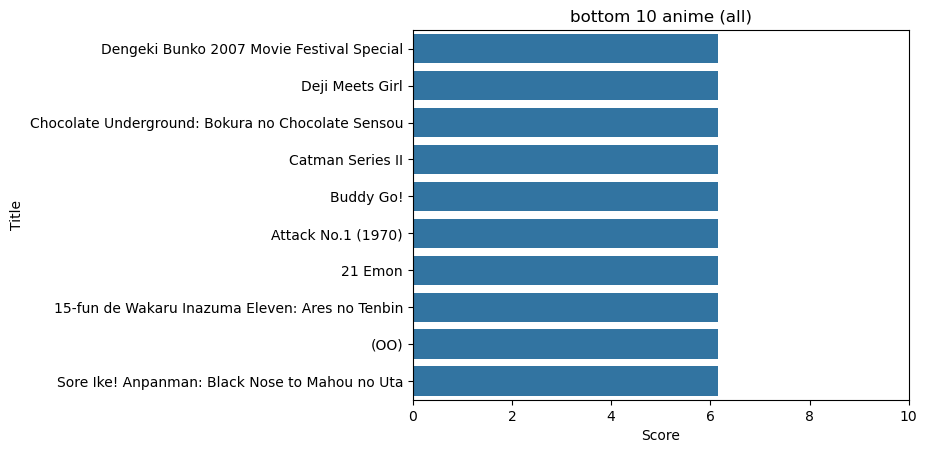

In [30]:
sns.barplot(data=bottom_x, x="Score", y="Title")
plt.xlim(0,10)

plt.title(f"bottom {x_bottom_x} anime (all)")
plt.show()

## 2. How many episodes does the highest-scoring title have?



In [31]:
x_top_x = 10
top_x = df_score.head(x_top_x)

top_x_epi_no = top_x[["Title", "Episodes"]].sort_values(by="Episodes", ascending=False)

top_x_epi_no

,Title,Episodes
7,Hunter x Hunter (2011),148.0
8,Ginga Eiyuu Densetsu,110.0
1,Fullmetal Alchemist: Brotherhood,64.0
3,Gintama°,51.0
6,Gintama',51.0
0,Sousou no Frieren,28.0
2,Steins;Gate,24.0
9,Gintama': Enchousen,13.0
4,Shingeki no Kyojin Season 3 Part 2,10.0
5,Gintama: The Final,1.0


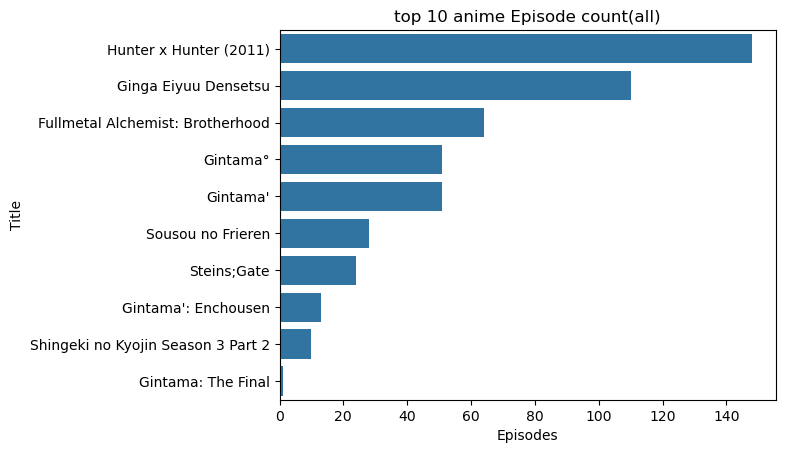

In [32]:
sns.barplot(data=top_x_epi_no, x="Episodes", y="Title")

plt.title(f"top {x_top_x} anime Episode count(all)")
plt.show()

## 3. Which title has the earliest start date?

In [33]:
data

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Start year,End year,Duration
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35,2023.0,2024.0,182 days
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09,2009.0,2010.0,456 days
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,2584616,9.07,2011.0,2011.0,153 days
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,636631,9.06,2015.0,2016.0,335 days
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,2305044,9.05,2019.0,2019.0,91 days
...,...,...,...,...,...,...,...,...,...,...,...,...
8645,8646,Hypersonic Music Club,8646,ONA,1.0,2023-08-01,2023-08-01,383,6.15,2023.0,2023.0,0 days
8646,8647,Iron Man: Rise of Technovore,8647,OVA,1.0,2013-04-01,2013-04-01,8616,6.15,2013.0,2013.0,0 days
8647,8648,Jewelpet Movie: Sweets Dance Princess,8648,Movie,1.0,2012-08-01,2012-08-01,1797,6.15,2012.0,2012.0,0 days
8648,8649,Si Hai Jing Qi,8649,ONA,12.0,2018-08-01,2018-11-01,911,6.15,2018.0,2018.0,92 days


In [34]:
stream_dict_early = {}
for stream_type in list(data["Stream type"].unique()):
    df_stream = data[data["Stream type"] == stream_type]
    earlest_date = min(df_stream['Start date'])
    stream_dict_early[stream_type] = df_stream[df_stream["Start date"] == earlest_date]['Title'].iloc[0]

In [35]:
print("Earliest video by media\n")
for typ, title in stream_dict_early.items():
    print(f"{typ}. {title}")

Earliest video by media

TV . Tetsuwan Atom
Movie . Saiyuuki
OVA . Tanpen Unico: Kuroi Kumo to Shiroi Hane
ONA . Tooi Sekai
TV Special . Kaitou Lupin: 813 no Nazo
Special . Ashita no Joe Pilots


In [36]:
stream_dict_early = {}
for stream_type in list(data["Stream type"].unique()):
    df_stream = data[data["Stream type"] == stream_type]
    latest_date = max(df_stream['Start date'])
    stream_dict_early[stream_type] = df_stream[df_stream["Start date"] == latest_date]['Title'].iloc[0]

In [37]:
print("Latest video by media\n")
for typ, title in stream_dict_early.items():
    print(f"{typ}. {title}")

Latest video by media

TV . "Oshi no Ko" 2nd Season
Movie . Bocchi the Rock! Movie
OVA . Watashi no Shiawase na Kekkon: Watashi no Shiawase na Katachi
ONA . Monogatari Series: Off & Monster Season
TV Special . Kinnikuman: Kanpeki Chоujin Shiso-hen Episode 0
Special . Girls & Panzer: Saishuushou Part 4 Specials


## 4. Which title has the most members and what is its score?


In [38]:
most_viewed = data.sort_values(by="Members", ascending=False).loc[0,["Title","Score"]]
most_viewed

Title    Sousou no Frieren
Score                 9.35
Name: 0, dtype: object

## 5. How many titles have a stream type of "TV" and a score above 7.0?

In [39]:
data.head(2)

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Start year,End year,Duration
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35,2023.0,2024.0,182 days
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09,2009.0,2010.0,456 days


In [40]:
data['Stream type'].unique()

array(['TV ', 'Movie ', 'OVA ', 'ONA ', 'TV Special ', 'Special '],
      dtype=object)

In [41]:
df_member7 = data[(data["Stream type"] == "TV ") & (data["Score"] > 7.0)].copy()
df_member7

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Start year,End year,Duration
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35,2023.0,2024.0,182 days
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09,2009.0,2010.0,456 days
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,2584616,9.07,2011.0,2011.0,153 days
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,636631,9.06,2015.0,2016.0,335 days
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,2305044,9.05,2019.0,2019.0,91 days
...,...,...,...,...,...,...,...,...,...,...,...,...
4194,4195,Tesagure! Bukatsumono Encore,4195,TV,12.0,2014-01-01,2014-03-01,5053,7.01,2014.0,2014.0,59 days
4195,4196,Tokimeki Memorial: Only Love,4196,TV,25.0,2006-10-01,2007-04-01,37976,7.01,2006.0,2007.0,182 days
4196,4197,Tsurupika Hagemaru-kun,4197,TV,59.0,1988-03-01,1989-10-01,3407,7.01,1988.0,1989.0,579 days
4198,4199,Uchuu Senkan Yamato III,4199,TV,25.0,1980-10-01,1981-04-01,6705,7.01,1980.0,1981.0,182 days


In [42]:
len(df_member7)

2048

## 6. What is the average score of titles that have more than 20 episodes and ended before 2020?


In [43]:
filtered_year = 2020
epi_num = 20
df_2020l = data[(data["End year"] < filtered_year) & (data['Episodes'] > epi_num)].copy()
avg_score = df_2020l["Score"].mean()
round(avg_score, 2)

7.08

## 7. What is the correlation between the number of episodes and the score?**

In [44]:
data[["Episodes", "Score"]].corr()

,Episodes,Score
Episodes,1.00000,0.04027
Score,0.04027,1.00000


## 8. Which title had the longest run (from start date to end date), and what was its rank?



In [45]:
data["Duration "] = data["End date"] - data["Start date"]
longest_run_title = data.loc[data['Duration '].idxmax()]


In [46]:
df_longest  = data.sort_values(by="Duration ", ascending=False)
#df_longest.pivot_table(index="Title", columns="Duration ", aggfunc="max")
df_longest[["Title", "Duration ", "Rank"]].set_index("Title").head(5)

,Duration,Rank
Title,,
Doraemon (1979),9466 days,920
Black Jack,6574 days,1164
Shounan Bakusouzoku,4564 days,1927
Gensou Mangekyou: The Memories of Phantasm,4291 days,1430
Naruto: Shippuuden,3681 days,303


## 8. For titles that started after 2015, what is the median number of members, and how does it compare to the median number of members for titles that started before 2015?

In [47]:
data.head()

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Start year,End year,Duration
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35,2023.0,2024.0,182 days
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09,2009.0,2010.0,456 days
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,2584616,9.07,2011.0,2011.0,153 days
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,636631,9.06,2015.0,2016.0,335 days
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,2305044,9.05,2019.0,2019.0,91 days


In [48]:
filtered_year = 2015
before_filtered = data[data['Start year'] < filtered_year]
after_filtered = data[data['Start year'] > filtered_year]

In [49]:
text = f"The Median amount of members for animes starting after {filtered_year} is {after_filtered['Members'].median()}"
print(text)

The Median amount of members for animes starting after 2015 is 29369.0


In [50]:
text = f"The Median amount of members for animes starting before {filtered_year} is {before_filtered['Members'].median()}"
print(text)

The Median amount of members for animes starting before 2015 is 16688.0


In [51]:
df_groupyear = data.groupby("Start year")["Members"].mean().reset_index(name="Avg members")
df_groupyear

,Start year,Avg members
0,1960.0,3557.000000
1,1961.0,5137.000000
2,1962.0,4832.000000
3,1963.0,7007.333333
4,1964.0,2816.500000
...,...,...
60,2020.0,140083.619497
61,2021.0,129085.439698
62,2022.0,103242.255208
63,2023.0,80688.871122


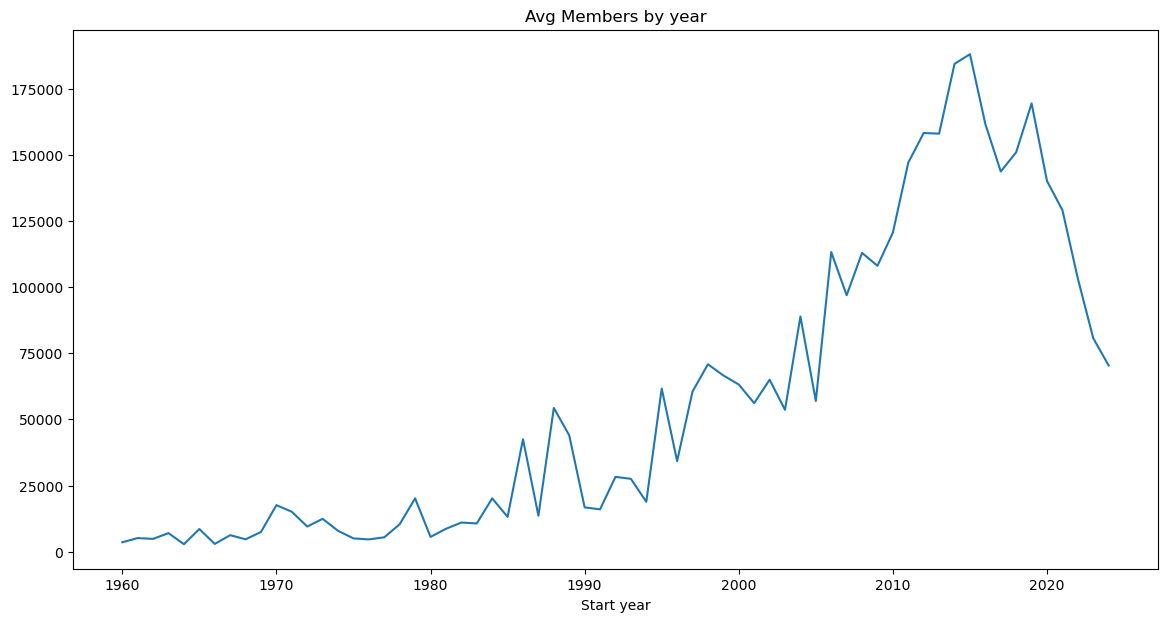

In [52]:
df_groupyear.plot(kind="line", y="Avg members", x="Start year", figsize=(14,7))
plt.title("Avg Members by year")
plt.legend().remove()
plt.show()


## 9. How does the trend of average scores compare between different stream types over the years?


In [63]:
df_groupyear_stream = data.groupby(["Start year","Stream type"])["Score"].mean().reset_index(name="Avg score")
df_groupyear_stream

,Start year,Stream type,Avg score
0,1960.0,Movie,6.230000
1,1961.0,Movie,6.625000
2,1962.0,Movie,6.550000
3,1963.0,Movie,6.340000
4,1963.0,TV,6.700000
...,...,...,...
275,2024.0,ONA,7.135946
276,2024.0,OVA,7.570000
277,2024.0,Special,7.170000
278,2024.0,TV,7.271562


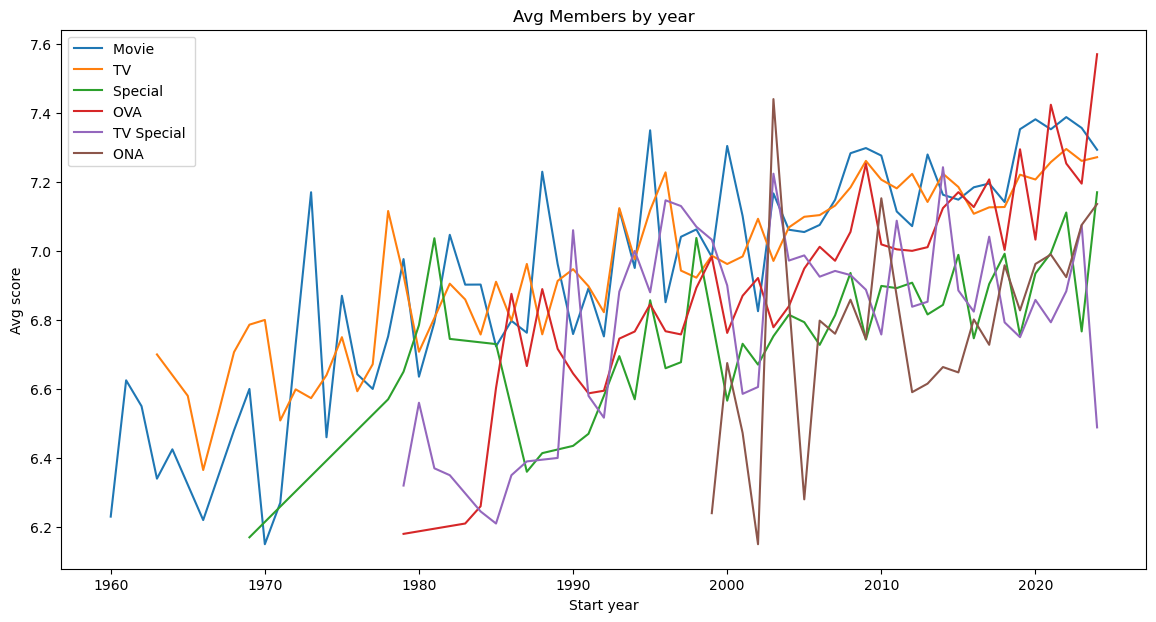

In [72]:
# df_groupyear_stream.plot(kind="line", y="Avg score", x="Start year", figsize=(14,7))
plt.figure(figsize=(14,7))
sns.lineplot(data=df_groupyear_stream, x= "Start year", y="Avg score", hue="Stream type")
plt.title("Avg Members by year")
plt.legend()
plt.show()
